## Regression Analysis

Correlation vs. Regression

* A scatterplot can be used to show the relatiohship between 2 variables.
* Correlation analysis is used to measure the strength of the association (linear relationship) between two variables
  - Correlation is only concerned with strength of relationship
  - No causal effect is implied with correlation
* Regression analysis is used to:
  - Predict the value of a dependent variable based on the value of at least one independent variable
  - Explain the impact of changes in an independent variable on the dependent variable

Dependent Variable: The variable we wish to predict or explain.

Independent Variable: The variable used to predict or explain the dependent variable.

Simple Linear Regression Model
* Only one independent variable, X
* Relationship between X and Y is described by a linear function
* Changes in Y are assumed to be related to changes in X


Y = b0 + b1 * X + e

e = Random error component

b0 = Y intercept

b1 = Slope Coefficient


Linear Regression is the process of finding a straight line that best fits a set of scattered data points.

scikit-learn is a data analysis library for Machine Learning in Python.

LinearRegression is an algorithm within the linear_model module of scikit-learn.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [7]:
x = np.array([5, 15, 25, 35, 45,55]).reshape((-1,1))
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [9]:
x.shape

(6, 1)

In [11]:
y = np.array([5, 20, 14,32, 22, 38])
y

array([ 5, 20, 14, 32, 22, 38])

In [13]:
y.shape

(6,)

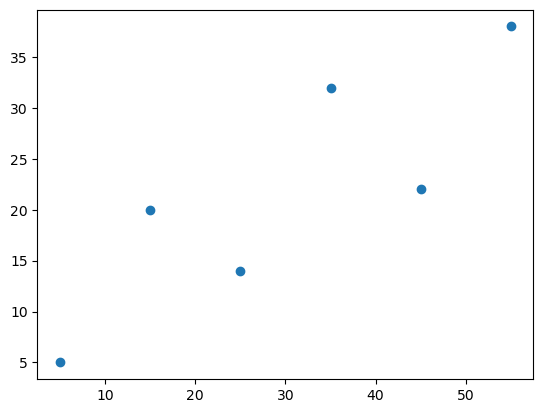

In [15]:
plt.scatter(x, y)

In [17]:
model = LinearRegression()

model.fit(x, y)

LinearRegression()

In [19]:
model.coef_ , model.intercept_

(array([0.54]), 5.633333333333333)

In [21]:
y_pred = model.predict(x)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

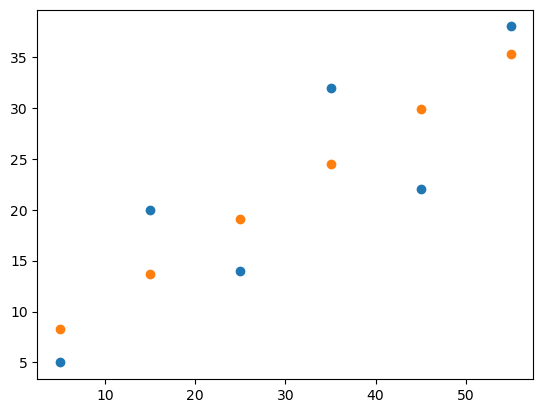

In [23]:
plt.scatter(x, y)
plt.scatter(x, y_pred)

In [25]:
r2 = model.score(x, y)
r2

0.715875613747954

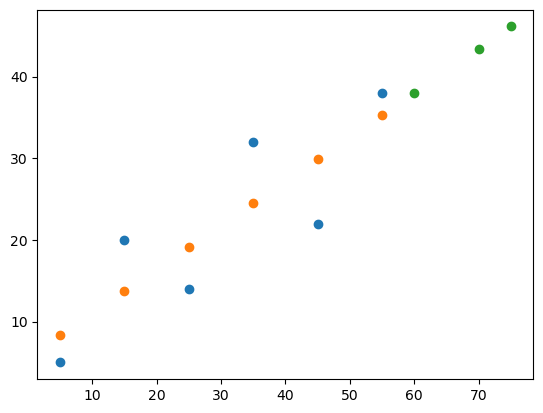

In [27]:
x_pred = np.array([60, 70, 75]).reshape((-1, 1))

y_pred1 = model.predict(x_pred)

plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.scatter(x_pred, y_pred1)

Let's use Linear Regression on mtcars dataset.

In [29]:
from pydataset import data

df = data('mtcars')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


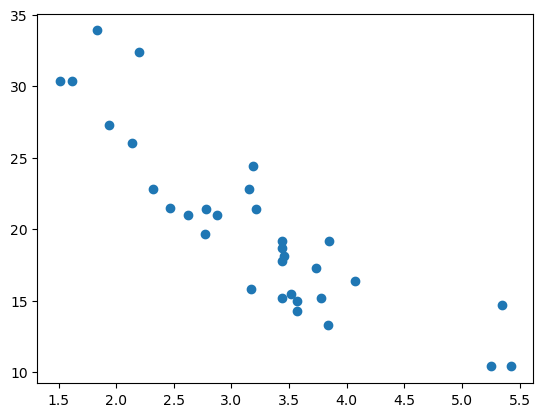

In [31]:
plt.scatter(df['wt'], df['mpg'])

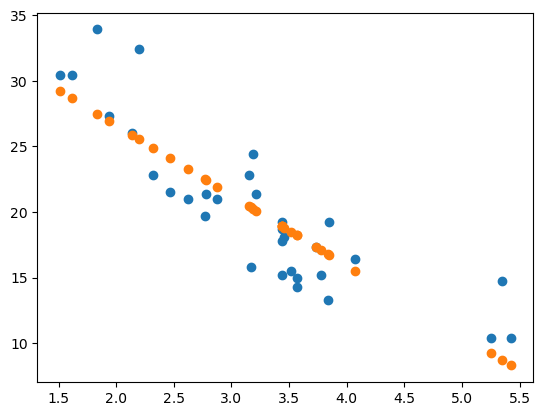

In [33]:
x = df['wt'].values.reshape((-1, 1))
y = df['mpg'].values.reshape((-1, 1))

model = LinearRegression()

model.fit(x, y)

y_pred = model.predict(x)

plt.scatter(x,y)
plt.scatter(x, y_pred)

In [35]:
model.coef_, model.intercept_

(array([[-5.34447157]]), array([37.28512617]))

In [37]:
model.score(x, y)

0.7528327936582646

Let's identify any potential outliers using the Box Plot

<Axes: ylabel='wt'>

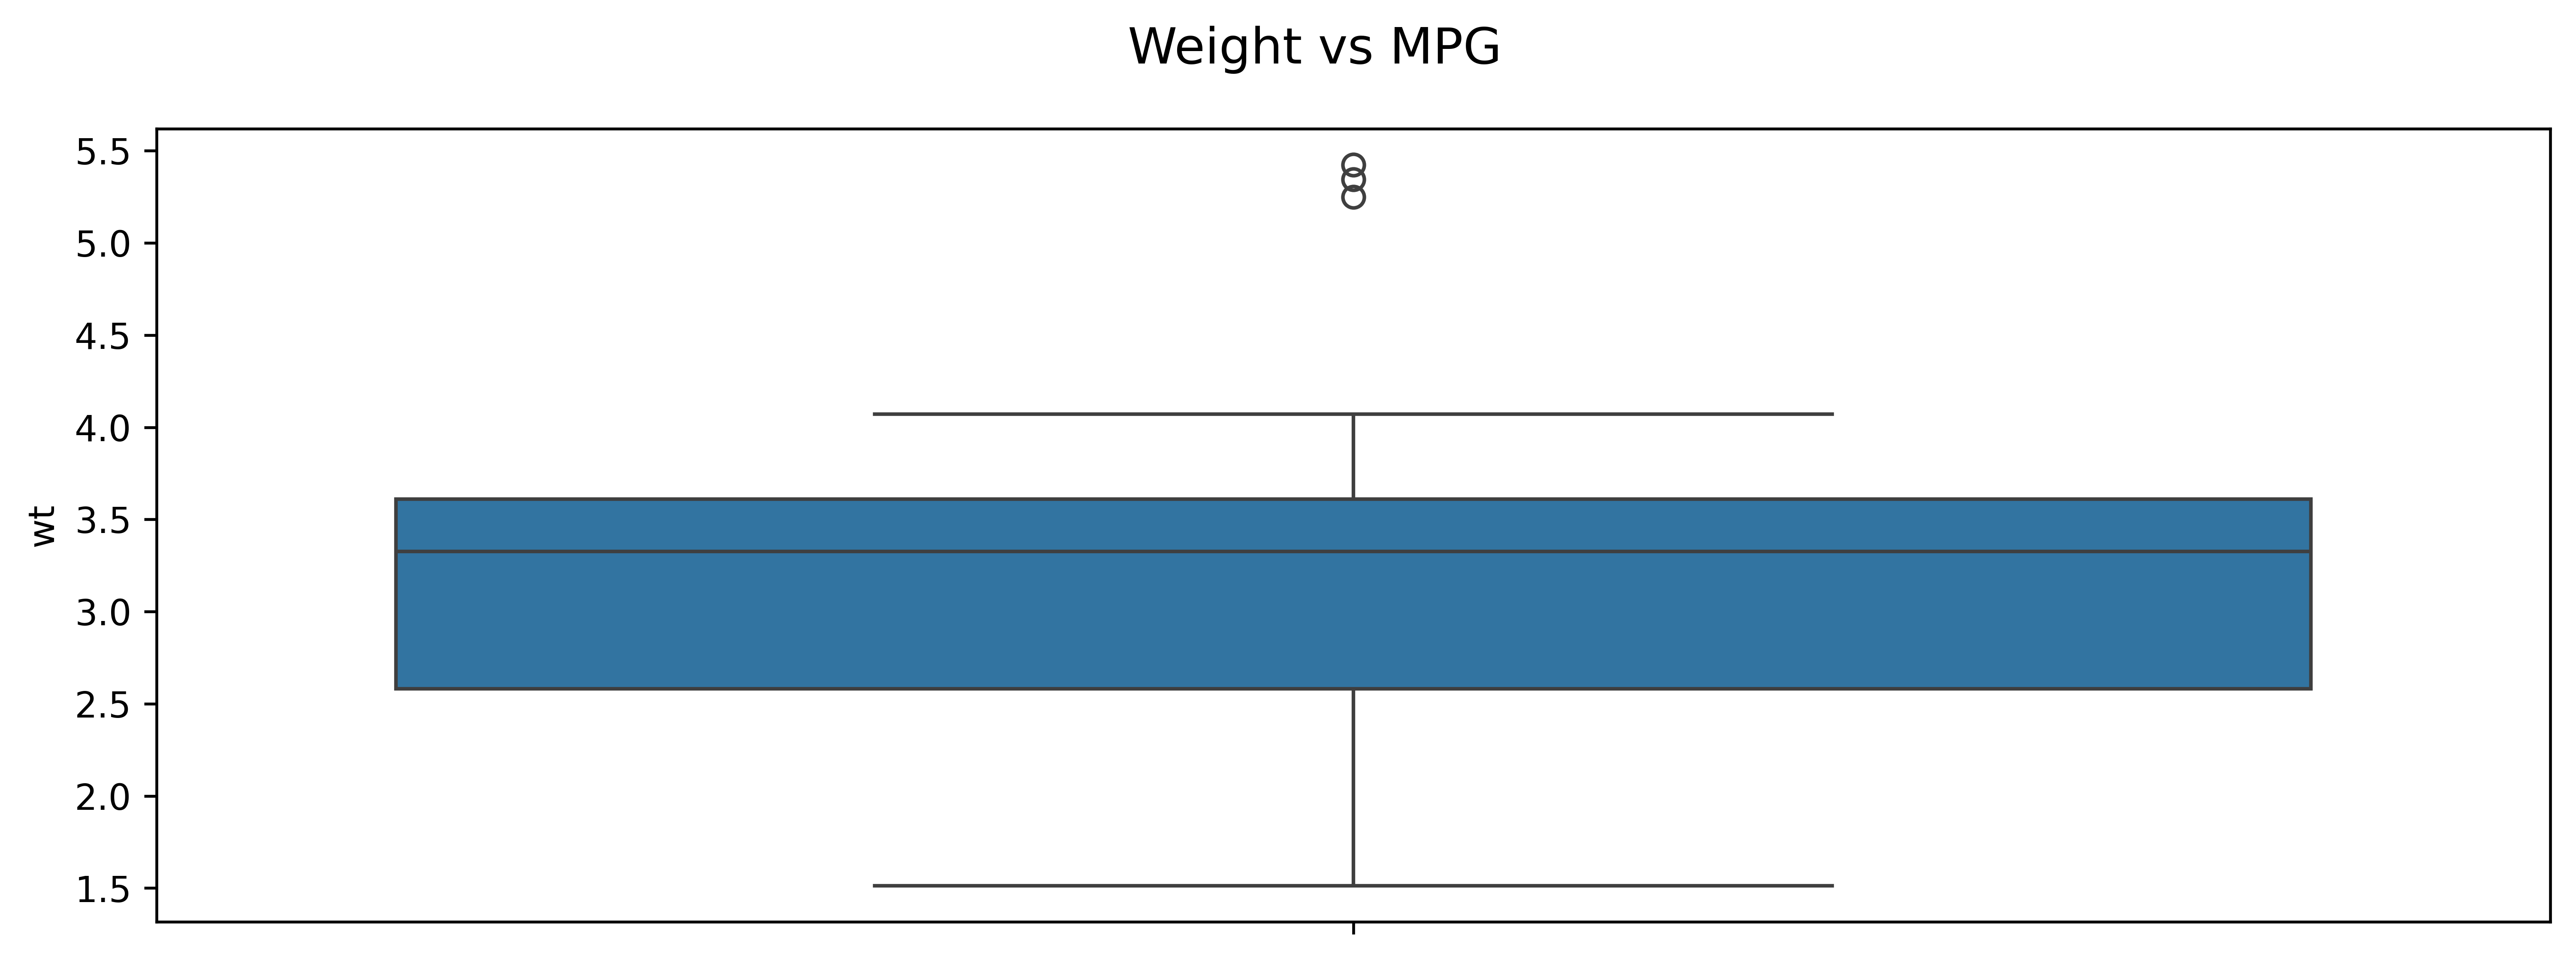

In [39]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 600)
fig.suptitle('Weight vs MPG', fontsize = 14)
sns.boxplot(data = df['wt'], ax = ax)

We can remove these outliers and train the model again without outliers

In [41]:
x1 = df[df['wt'] < 4.5]['wt'].values.reshape((-1, 1))

y1 = df[df['wt'] < 4.5]['mpg'].values.reshape((-1, 1))

model.fit(x1, y1)
model.coef_, model.intercept_

(array([[-6.82128716]]), array([41.39292954]))

In [43]:
model.score(x1, y1)

0.7729537551265148

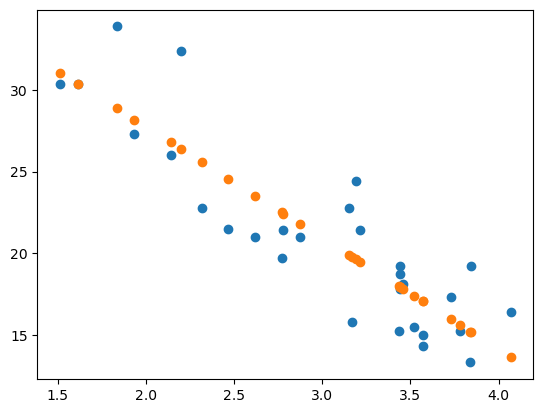

In [45]:
y_pred1 = model.predict(x1)

plt.scatter(x1, y1)
plt.scatter(x1, y_pred1)

Let's take an example of Multilinear Regression.

Let's consider independent variables as 'wt', and 'qsec' and the dependent variable as 'mpg'.

In [47]:
x = df[['wt', 'qsec']].values

y = df['mpg'].values

model = LinearRegression()

model.fit(x, y)

model.score(x, y)

0.8264161273395514

In [49]:
model.coef_, model.intercept_

(array([-5.04798198,  0.92919798]), 19.746222596481182)

In [51]:
y_pred = model.predict(x)

y_pred

array([21.81510855, 21.04822401, 25.3272788 , 21.58056924, 18.19611419,
       21.06858808, 16.44342291, 22.22711966, 25.12371308, 19.3854876 ,
       19.94300639, 15.36898077, 17.27113424, 17.39041433,  9.95129686,
        8.92427632,  8.9513877 , 26.7321469 , 28.80247828, 28.97421545,
       25.89619858, 17.65289593, 18.48152953, 14.68091265, 16.17955742,
       27.54021927, 24.46114741, 27.81207171, 17.21749041, 20.16588119,
       15.29121742, 22.9959151 ])

Till now, we have been training and predicting on the same data.

However, in practice, we split the data into two parts - training data and testing data.

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
x = df['wt'].values.reshape((-1, 1))
y = df['mpg'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7599065720794005

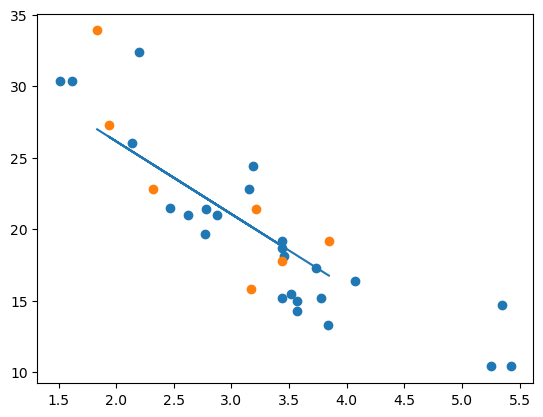

In [57]:
y_pred = model.predict(x_test)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)

In [59]:
model.score(x_test, y_test)

0.6562006251994377

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)  
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)  
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 2.677930893017654
MSE: 11.399404984458645
RMSE: 3.376300487879988


Let's use Linear Regression using statsmodel library.

In [119]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

In [111]:
mtcars = data('mtcars')

df1 = mtcars[['wt', 'hp', 'mpg']]
df1.head()

,wt,hp,mpg
Mazda RX4,2.620,110,21.0
Mazda RX4 Wag,2.875,110,21.0
Datsun 710,2.320,93,22.8
Hornet 4 Drive,3.215,110,21.4
Hornet Sportabout,3.440,175,18.7


In [123]:
model = ols('mpg ~ wt', data = df1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.29e-10
Time:                        14:19:19   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.0

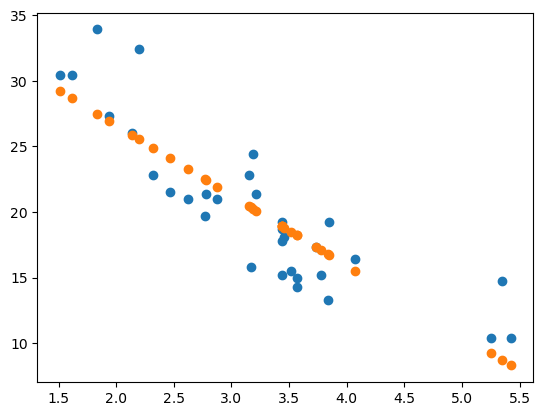

In [127]:
y_pred = model.predict(df1['wt'])

plt.scatter(df['wt'], df['mpg'])
plt.scatter(df['wt'], y_pred)

# Case Study

## Real Estate price prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('Real estate.csv')

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Correlation Heatmap

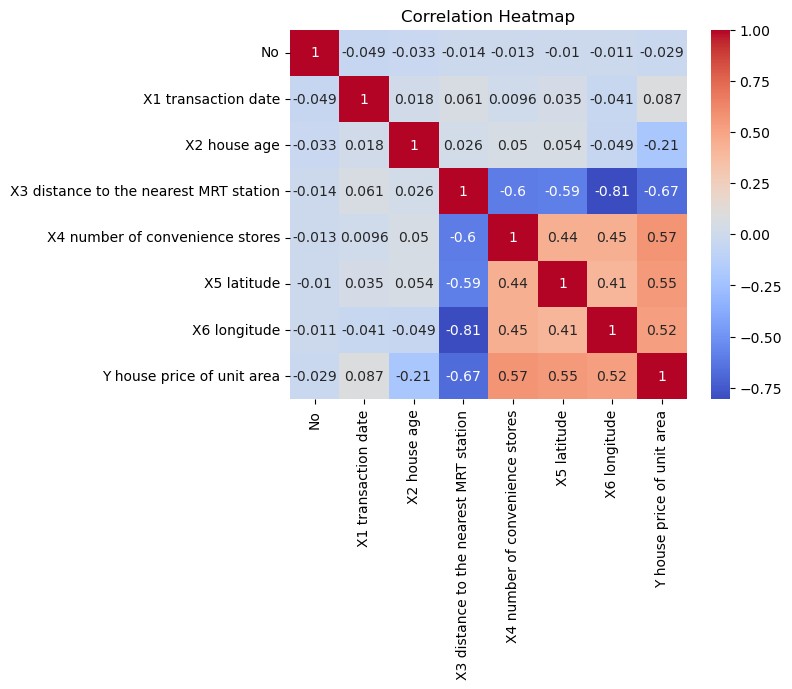

In [8]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
X = df.drop(['No', 'Y house price of unit area'], axis = 1).values
#X.head()

In [12]:
y = df['Y house price of unit area'].values
#y.head()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [16]:
model.coef_

array([ 5.15324160e+00, -2.47219817e-01, -4.36888435e-03,  1.06291805e+00,
        2.37693210e+02, -1.38106079e+01])

In [18]:
model.intercept_

-14588.316810616734

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
r2

0.6375465707979815

In [26]:
mse = mean_squared_error(y_test, y_pred)
mse

81.86416095702086

We can get the input from users and then get the output from the trained model.

In [37]:
data = []

lst = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


for i in range(0,6):
    s = "Enter value of " + lst[i] + " Minimum is -> " + str(min(df[lst[i]])) + " Maximum is -> " + str(max(df[lst[i]]))
    data.append(float(input(s)))


dat = np.array(data).reshape((1, -1))

Enter value of X1 transaction date Minimum is -> 2012.667 Maximum is -> 2013.583 2013.583
Enter value of X2 house age Minimum is -> 0.0 Maximum is -> 43.8 42
Enter value of X3 distance to the nearest MRT station Minimum is -> 23.38284 Maximum is -> 6488.021 100
Enter value of X4 number of convenience stores Minimum is -> 0 Maximum is -> 10 3
Enter value of X5 latitude Minimum is -> 24.93207 Maximum is -> 25.01459 25
Enter value of X6 longitude Minimum is -> 121.47353 Maximum is -> 121.56627 121.5


In [39]:
dat

array([[2013.583,   42.   ,  100.   ,    3.   ,   25.   ,  121.5  ]])

In [41]:
model.predict(dat)

array([44.87290309])

Let's implement this using statsmodels.

In [332]:
from statsmodels.formula.api import ols

model = ols('y~X', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     94.59
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           4.86e-74
Time:                        18:18:34   Log-Likelihood:                -1487.0
No. Observations:                 414   AIC:                             2988.
Df Residuals:                     407   BIC:                             3016.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.444e+04   6775.671     -2.131      0.0